# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_results.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_information
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
address
sample_id_given_by_the_sample_provider
submitting_lab
sample_id_given_by_the_submitting_laboratory
authors
submitter
submission_date
query
strand
%n
length(nt)
length(aa)
#muts
%muts
#uniquemuts
%uniquemuts
#existingmuts
%existingmuts
symbol
reference
uniquemutlist
existingmutlist
clade
ifexistspecialchar


# Preprocessing and cleaning the data

In [4]:
#important features
start_data_row = 0
Final_data_row = 1129
Data = data.loc[start_data_row:Final_data_row, ['status','%n','length(nt)','length(aa)',
                                                   '%muts','%uniquemuts','%existingmuts','existingmutlist','clade']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#removing the % from the data
Data['%n'] = Data['%n'].str.replace('%', ' ') 
Data['%muts'] = Data['%muts'].str.replace('%', ' ') 
Data['%uniquemuts'] = Data['%uniquemuts'].str.replace('%', ' ') 
Data['%existingmuts'] = Data['%existingmuts'].str.replace('%', ' ') 
Data['%n'].astype(float)
Data['%muts'].astype(float)
Data['%uniquemuts'].astype(float)
Data['%existingmuts'].astype(float)

0       0.05
1       0.04
2       0.06
3       0.03
4       0.02
        ... 
1123    0.05
1124    0.05
1125    0.05
1126    0.07
1127    0.06
Name: %existingmuts, Length: 1128, dtype: float64

In [6]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.dropna(subset = ['existingmutlist'], inplace=True)
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='n/a'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='NA'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='-'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='Unknown'].index, inplace=True)

Data.index = range(len(Data))

In [7]:
#chacking if there is any null data in ExistingMutList
for i in range(len(Data)):
    if pd.isnull(Data.existingmutlist[i]) is True:
        print('True')

In [8]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

In [9]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['existingmutlist']]),pd.get_dummies(Data[['clade']]), Data[['status','%n','length(nt)','length(aa)',
                                                   '%muts','%uniquemuts']]], axis=1)
Data_model.head()

,existingmutlist_(E_T30I),"existingmutlist_(NS3_G196V,NS8_G8R,NS8_L84S)",existingmutlist_(NS3_G251V),"existingmutlist_(NS7b_T40I,NS8_L84S)",existingmutlist_(NS8_L84S),"existingmutlist_(NS8_L84S,N_G238C)","existingmutlist_(NS8_L84S,N_S202N)","existingmutlist_(NSP10_T111I,NSP12_P323L,Spike_D614G,N_N140T,N_G97S)",existingmutlist_(NSP10_T51A),"existingmutlist_(NSP12_A449T,NSP12_P323L,Spike_D614G,NS3_Q57H,NS7a_V24F)",...,clade_G,clade_Other,clade_S,clade_V,status,%n,length(nt),length(aa),%muts,%uniquemuts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.00,29890,9710,0.04,0.00
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.00,29859,9710,0.04,0.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.00,29917,9710,0.05,0.01
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29892,9710,0.08,0.01
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29828,9710,0.02,0.00


In [11]:
#checking the balance in the data
Data_model['status'].value_counts()

0    894
1     39
Name: status, dtype: int64

In [12]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()
X

,existingmutlist_(E_T30I),"existingmutlist_(NS3_G196V,NS8_G8R,NS8_L84S)",existingmutlist_(NS3_G251V),"existingmutlist_(NS7b_T40I,NS8_L84S)",existingmutlist_(NS8_L84S),"existingmutlist_(NS8_L84S,N_G238C)","existingmutlist_(NS8_L84S,N_S202N)","existingmutlist_(NSP10_T111I,NSP12_P323L,Spike_D614G,N_N140T,N_G97S)",existingmutlist_(NSP10_T51A),"existingmutlist_(NSP12_A449T,NSP12_P323L,Spike_D614G,NS3_Q57H,NS7a_V24F)",...,"existingmutlist_(Spike_T307I,NS3_G251V)",clade_G,clade_Other,clade_S,clade_V,%n,length(nt),length(aa),%muts,%uniquemuts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,29890.0,9710.0,0.04,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,29859.0,9710.0,0.04,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,29917.0,9710.0,0.05,0.01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.00,29892.0,9710.0,0.08,0.01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.00,29828.0,9710.0,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.44,29903.0,9710.0,0.05,0.00
929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.45,29903.0,9710.0,0.05,0.00
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.44,29903.0,9710.0,0.05,0.00
931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.45,29903.0,9710.0,0.07,0.00


### Scaling the data

In [13]:


# Scaling the data to standarize them
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_normal_scaled = X_scaled[y == 0] 
X_deseased_scaled = X_scaled[y == 1] 


In [14]:
len(X_deseased_scaled)

39

## Simple feedforward autoencoder

In [15]:
# import keras
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Input, Dense

window_length = 410
encoding_dim = 200
epochs = 500


# this is our input placeholder
input_window = Input(shape=(window_length,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_window)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(window_length, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)


autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(X_normal_scaled, X_normal_scaled,
                epochs=epochs,
                batch_size=1024)

# Separating the points encoded by the Auto-encoder as normal and fraud 
decoded_X_normal = autoencoder.predict(X_normal_scaled)
decoded_X_deseased = autoencoder.predict(X_deseased_scaled)
# Combining the encoded points into a single table  
encoded_X = np.append(decoded_X_normal, decoded_X_deseased, axis = 0) 
y_normal = np.zeros(decoded_X_normal.shape[0]) 
y_deceased = np.ones(decoded_X_deseased.shape[0]) 
encoded_y = np.append(y_normal, y_deceased) 



Using TensorFlow backend.
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 410)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               82200     
_________________________________________________________________
dense_2 (Dense)              (None, 410)               82410     
Total params: 164,610
Trainable params: 164,610
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
894/894 [==============================] - 0s 207us/step - loss: 0.7566
Epoch 2/500
894/894 [==============================] - 0s 54us/step - loss: 0.7106
Epoch 3/500
894/894 [==============================] - 0s 52us/step - loss: 0.6671
Epoch 4/500
8

Epoch 83/500
894/894 [==============================] - 0s 50us/step - loss: -0.7026
Epoch 84/500
894/894 [==============================] - 0s 48us/step - loss: -0.7151
Epoch 85/500
894/894 [==============================] - 0s 48us/step - loss: -0.7275
Epoch 86/500
894/894 [==============================] - 0s 51us/step - loss: -0.7390
Epoch 87/500
894/894 [==============================] - 0s 54us/step - loss: -0.7505
Epoch 88/500
894/894 [==============================] - 0s 49us/step - loss: -0.7610
Epoch 89/500
894/894 [==============================] - 0s 48us/step - loss: -0.7715
Epoch 90/500
894/894 [==============================] - 0s 48us/step - loss: -0.7817
Epoch 91/500
894/894 [==============================] - 0s 48us/step - loss: -0.7916
Epoch 92/500
894/894 [==============================] - 0s 47us/step - loss: -0.8014
Epoch 93/500
894/894 [==============================] - 0s 49us/step - loss: -0.8101
Epoch 94/500
894/894 [==============================] - 0s 48us/s

Epoch 179/500
894/894 [==============================] - 0s 53us/step - loss: -1.3109
Epoch 180/500
894/894 [==============================] - 0s 48us/step - loss: -1.3119
Epoch 181/500
894/894 [==============================] - 0s 43us/step - loss: -1.3129
Epoch 182/500
894/894 [==============================] - 0s 57us/step - loss: -1.3139
Epoch 183/500
894/894 [==============================] - 0s 55us/step - loss: -1.3149
Epoch 184/500
894/894 [==============================] - 0s 48us/step - loss: -1.3158
Epoch 185/500
894/894 [==============================] - 0s 55us/step - loss: -1.3167
Epoch 186/500
894/894 [==============================] - 0s 49us/step - loss: -1.3175
Epoch 187/500
894/894 [==============================] - 0s 49us/step - loss: -1.3184
Epoch 188/500
894/894 [==============================] - 0s 47us/step - loss: -1.3192
Epoch 189/500
894/894 [==============================] - 0s 48us/step - loss: -1.3200
Epoch 190/500
894/894 [==============================]

Epoch 275/500
894/894 [==============================] - 0s 54us/step - loss: -1.3567
Epoch 276/500
894/894 [==============================] - 0s 49us/step - loss: -1.3569
Epoch 277/500
894/894 [==============================] - 0s 51us/step - loss: -1.3571
Epoch 278/500
894/894 [==============================] - 0s 58us/step - loss: -1.3574
Epoch 279/500
894/894 [==============================] - 0s 70us/step - loss: -1.3576
Epoch 280/500
894/894 [==============================] - 0s 58us/step - loss: -1.3578
Epoch 281/500
894/894 [==============================] - 0s 58us/step - loss: -1.3580
Epoch 282/500
894/894 [==============================] - 0s 59us/step - loss: -1.3582
Epoch 283/500
894/894 [==============================] - 0s 57us/step - loss: -1.3584
Epoch 284/500
894/894 [==============================] - 0s 57us/step - loss: -1.3586
Epoch 285/500
894/894 [==============================] - 0s 59us/step - loss: -1.3588
Epoch 286/500
894/894 [==============================]

Epoch 371/500
894/894 [==============================] - 0s 59us/step - loss: -1.3677
Epoch 372/500
894/894 [==============================] - 0s 62us/step - loss: -1.3677
Epoch 373/500
894/894 [==============================] - 0s 65us/step - loss: -1.3678
Epoch 374/500
894/894 [==============================] - 0s 57us/step - loss: -1.3678
Epoch 375/500
894/894 [==============================] - 0s 58us/step - loss: -1.3679
Epoch 376/500
894/894 [==============================] - 0s 54us/step - loss: -1.3679
Epoch 377/500
894/894 [==============================] - 0s 59us/step - loss: -1.3680
Epoch 378/500
894/894 [==============================] - 0s 55us/step - loss: -1.3680
Epoch 379/500
894/894 [==============================] - 0s 57us/step - loss: -1.3681
Epoch 380/500
894/894 [==============================] - 0s 52us/step - loss: -1.3681
Epoch 381/500
894/894 [==============================] - 0s 52us/step - loss: -1.3682
Epoch 382/500
894/894 [==============================]

Epoch 467/500
894/894 [==============================] - 0s 59us/step - loss: -1.3700
Epoch 468/500
894/894 [==============================] - 0s 62us/step - loss: -1.3700
Epoch 469/500
894/894 [==============================] - 0s 56us/step - loss: -1.3700
Epoch 470/500
894/894 [==============================] - 0s 59us/step - loss: -1.3700
Epoch 471/500
894/894 [==============================] - 0s 56us/step - loss: -1.3700
Epoch 472/500
894/894 [==============================] - 0s 61us/step - loss: -1.3700
Epoch 473/500
894/894 [==============================] - 0s 57us/step - loss: -1.3700
Epoch 474/500
894/894 [==============================] - 0s 71us/step - loss: -1.3701
Epoch 475/500
894/894 [==============================] - 0s 68us/step - loss: -1.3701
Epoch 476/500
894/894 [==============================] - 0s 58us/step - loss: -1.3701
Epoch 477/500
894/894 [==============================] - 0s 58us/step - loss: -1.3701
Epoch 478/500
894/894 [==============================]

In [16]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X, encoded_y, test_size=0.2, random_state=5, stratify=y)


### Balancing the data

In [17]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

In [18]:
# Scaling the data

#Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Random Forest model

In [19]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=30,max_depth = 60, max_features = 'log2')
# Fit on training data
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
RF_probs = model.predict_proba(X_test)[:,1]
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))





R^2 _train= 0.9628330995792427
R^2 _test= 0.9197860962566845


In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,1.0,1.0
9,0.0,0.0


In [21]:
### Cross validation 

#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())


Cross-Validation Accuracy Scores [0.92307692 0.94405594 0.97202797 0.93706294 0.95804196 0.93706294
 0.91549296 0.95774648 0.97887324 0.95070423]
CV-scores_min =  0.9154929577464789
CV_scores_mean = 0.9474145572737122
CV_scores_max = 0.9788732394366197


Mean Absolute Error: 0.08021390374331551
Mean Squared Error: 0.08021390374331551
Root Mean Squared Error: 0.2832205920185104
roc_auc = 0.9392265193370166
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.939


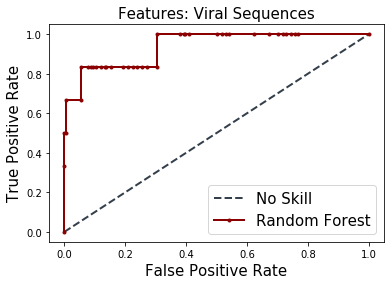

In [22]:
### Performance measurement metrics

import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
print( 'roc_auc =', roc_auc_score(y_test, RF_probs) )

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
RF_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
RF_probs = RF_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (RF_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',  linewidth=2,  color = '#333F4B')
pyplot.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest', linewidth=2, color = 'darkred')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=15)
pyplot.ylabel('True Positive Rate',fontsize=15)
pyplot.title('Features: Viral Sequences',fontsize=15)
# show the legend
pyplot.legend(fontsize=15)
# show the plot
pyplot.show()

In [25]:
from sklearn.metrics import recall_score
recall_score(y_test, y_hat, average='weighted')


0.9197860962566845